# **<span style="color:#DEABAF">Boston Housing dataset - Lab 1</span>**
**@author : Albane COIFFE**  
**@email : albane.coiffe@efrei.net**  
Mercredi 4 septembre 2024

**The goal is to predict the median value of owner-occupied homes (in $1000s) based on various features.**


## **<span style="color:#DEABAF">Importing Libaries</span></u>**

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## **<span style="color:#DEABAF">Download the dataset</span>**
downgrade the scikitlearn version because the dataset was deleted in the new version from sklearn.datasets import load_boston


In [2]:
boston = load_boston()
data = pd.DataFrame(boston.data, columns=boston.feature_names) 
data['MEDV'] = boston.target

/usr/local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## **<span style="color:#DEABAF">Data Exploration</span>**
Before we proceed with the regression, it's important to explore the data to understand its characteristics.  
We will use the `ydata_profiling` package to generate a detailed report.

`ydata_profiling` is a Python library that simplifies data exploration by generating a comprehensive report on a dataset with minimal code.

### <span style="color:#DEABAF">Create the Report</span>

In [4]:
profile = ProfileReport(data, title='Boston Housing Data Report') 
profile.to_file('boston_housing_report.html')
print('Report is saved as boston_housing_report.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 79.55it/s]

Report is saved as boston_housing_report.html


### <span style="color:#DEABAF">Analyze the Report</span>

14 columns, 506 rows, no missing values

#### <u>Column name definitions with [kaggle](https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset) :</u> 
- <span style="color:#DEABAF">CRIM </span> - per capita crime rate by town
- <span style="color:#DEABAF">ZN</span>  - proportion of residential land zoned for lots over 25,000 sq.ft.
- <span style="color:#DEABAF">INDUS </span> - proportion of non-retail business acres per town.
- <span style="color:#DEABAF">CHAS </span> - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- <span style="color:#DEABAF">NOX </span> - nitric oxides concentration (parts per 10 million)
- <span style="color:#DEABAF">RM</span>  - average number of rooms per dwelling
- <span style="color:#DEABAF">AGE</span>  - proportion of owner-occupied units built prior to 1940
- <span style="color:#DEABAF">DIS </span> - weighted distances to five Boston employment centres
- <span style="color:#DEABAF">RAD</span>  - index of accessibility to radial highways
- <span style="color:#DEABAF">TAX</span> - full-value property-tax rate per $10,000
- <span style="color:#DEABAF">PTRATIO</span> - pupil-teacher ratio by town
- <span style="color:#DEABAF">B</span> - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- <span style="color:#DEABAF">LSTAT</span> - % lower status of the population
- <span style="color:#DEABAF">MEDV</span> - Median value of owner-occupied homes in $1000's



#### <u>Etude de la distribution des données :</u> 

1. <span style="color:#DEABAF">**CRIM**</span>
- <span style="color:#DEABAF">Minimum :</span> 0.00632
- <span style="color:#DEABAF">Maximum : </span>88.9762
- <span style="color:#DEABAF">Q1 : </span>0.082045
- <span style="color:#DEABAF">median :</span> 0.25651
- <span style="color:#DEABAF">Q3 :</span> 3.6770825
- <span style="color:#DEABAF">Range :</span> 88.96988
- <span style="color:#DEABAF"> Mean :</span> 3.6135236
- <span style="color:#DEABAF">Skewness (Asymétrie) : </span>5.2231    

The distribution of **CRIM** is highly skewed to the right, as indicated by the high positive skewness value. The mean (3.61) is greater than the median (0.26), confirming a right-skewed distribution. Most towns have a low crime rate, but a few have exceptionally high rates, with some extreme values like the maximum of 88.9762 indicating exceptionally high crime rates in certain areas.



2. <span style="color:#DEABAF">**ZN**</span>  
-  <span style="color:#DEABAF">Minimum : </span>  0
- <span style="color:#DEABAF"> Maximum : </span>  100
-  <span style="color:#DEABAF">Q1 :</span>   0
-  <span style="color:#DEABAF">median </span>  : 0
-  <span style="color:#DEABAF">Q3 :</span>   12.5
-  <span style="color:#DEABAF">Range :</span>   100
-  <span style="color:#DEABAF">Mean :</span>   11.363636
-  <span style="color:#DEABAF">Zeros (%):</span>   73.5%   

The distribution of **ZN** is extremely skewed, with a major concentration of values around zero (73.5% of values are 0). There are a few peaks at higher values, representing towns with larger residential lots, but these are rare. This indicates that a large majority of towns (about three-quarters) do not have residential land zoned for lots over 25,000 sq.ft., likely because such large lots are not common in many areas.

3. <span style="color:#DEABAF">**INDUS**  </span>  
-  <span style="color:#DEABAF">Minimum : </span>  0.46
-  <span style="color:#DEABAF">Maximum : </span>  27.74
-  <span style="color:#DEABAF">Q1 : </span>  5.19
-  <span style="color:#DEABAF">median : </span>  9.69
-  <span style="color:#DEABAF">Q3 :</span>   18.1
-  <span style="color:#DEABAF">Range : </span>  27.28
-  <span style="color:#DEABAF">Mean : </span>  11.136779
-  <span style="color:#DEABAF">Skewness :</span>   0.29502157  

The distribution of **INDUS** is somewhat concentrated around lower to medium values, with most towns having between 5% and 20% of their land dedicated to industry. The distribution is fairly symmetric with a low skewness value (0.30), indicating that while there are a few extreme values, the overall distribution is relatively balanced.

4. <span style="color:#DEABAF">**CHAS**   </span>  

Categorical :  
0 : La zone n’est pas bordée par la rivière.  
1 : La zone est bordée par la rivière.  
-  <span style="color:#DEABAF">0 : </span>  471 
-  <span style="color:#DEABAF">1 :</span>   35  

There is a strong imbalance in **CHAS**, with a majority of observations being 0 (non-river-bound areas). Over 93% of the observations are 0, indicating that most areas are not bounded by the river.

5. <span style="color:#DEABAF">**NOX**</span>  
-  <span style="color:#DEABAF">Minimum : </span>  0.385
-  <span style="color:#DEABAF">Maximum : </span>  0.871
-  <span style="color:#DEABAF">Q1 :</span>   0.449
-  <span style="color:#DEABAF">median : </span>  0.538
-  <span style="color:#DEABAF">Q3 :</span>   0.624
-  <span style="color:#DEABAF">Range :</span>   0.486
-  <span style="color:#DEABAF">Mean : </span>  0.55469506  

The concentration of nitrogen oxides (**NOX**) is spread over a relatively narrow range, with most values clustering around the median. This suggests that nitrogen oxide levels are fairly consistent across different areas, with limited variability. 


6. <span style="color:#DEABAF"> **RM**</span>  
-  <span style="color:#DEABAF">Minimum : </span>  3.561
-  <span style="color:#DEABAF">Maximum : </span>  8.78 
-  <span style="color:#DEABAF">Q1 : </span>  	5.8855
-  <span style="color:#DEABAF">median :</span>   6.2085
-  <span style="color:#DEABAF">Q3 : </span>  6.6235
-  <span style="color:#DEABAF">Range :</span>   5.219
-  <span style="color:#DEABAF">Mean : </span>  6.2846

The number of rooms per dwelling (**RM**) is mostly between 5 and 7, with few dwellings having more than 7 rooms or fewer than 4 rooms. The distribution is fairly concentrated around this range, indicating that most homes are of average size.

7. <span style="color:#DEABAF">**AGE**</span>:
- <span style="color:#DEABAF">Min :</span> 2.9
- <span style="color:#DEABAF">Q1 (First Quartile) :</span> 45.025
- <span style="color:#DEABAF">Median :</span> 77.5
- <span style="color:#DEABAF">Q3 (Third Quartile) :</span> 94.075
- <span style="color:#DEABAF">Range :</span> 97.1
- <span style="color:#DEABAF">Max :</span> 100

The values of **AGE** are fairly spread out, with a median of 77.5 and a range extending from 2.9 to 100. Notably, there is a significant number of properties at the maximum value of 100, representing about 8.5% of the data. This high frequency at the maximum indicates that a substantial proportion of properties have been built before 1940, contributing to the high values in the dataset.

8. <span style="color:#DEABAF">**DIS**</span>:
- <span style="color:#DEABAF">Min :</span> 1.1296
- <span style="color:#DEABAF">Q1 (First Quartile) :</span> 2.100175
- <span style="color:#DEABAF">Median :</span> 3.20745
- <span style="color:#DEABAF">Q3 (Third Quartile) :</span> 5.188425
- <span style="color:#DEABAF">Range :</span> 10.9969
- <span style="color:#DEABAF">Max :</span> 12.1265
- <span style="color:#DEABAF">Mean :</span> 3.80

The values of DIS are concentrated more heavily around 2.5, as observed in the histogram. The mean (3.80) and the median (3.21) are both higher due to a few higher values stretching the distribution. While most distances are relatively low, the presence of some high values affects the mean, indicating a right-skewed distribution.


9. <span style="color:#DEABAF">**RAD**</span>:
- <span style="color:#DEABAF">Min :</span> 1
- <span style="color:#DEABAF">Q1 (First Quartile) :</span> 4
- <span style="color:#DEABAF">Median :</span> 5
- <span style="color:#DEABAF">Q3 (Third Quartile) :</span> 24
- <span style="color:#DEABAF">Range :</span> 23
- <span style="color:#DEABAF">Max :</span> 24
- <span style="color:#DEABAF">Mean :</span> 9.55

The values of RAD are concentrated around a few specific values: 24, 5, and 4. The mean (9.55) is notably higher than the median (5), indicating that there are a few high values that pull the average up. This suggests that while most areas have relatively low accessibility scores, a smaller number of areas have very high accessibility, leading to a larger range and mean.

10. <span style="color:#DEABAF">**TAX**</span>:
- <span style="color:#DEABAF">Min :</span> 187
- <span style="color:#DEABAF">Q1 (First Quartile) :</span> 279
- <span style="color:#DEABAF">Median :</span> 330
- <span style="color:#DEABAF">Q3 (Third Quartile) :</span> 666
- <span style="color:#DEABAF">Range :</span> 524
- <span style="color:#DEABAF">Max :</span> 711

The values of TAX are quite spread out. The median is 330, while the range from 187 to 711 shows considerable variation in property tax rates across different areas. The histogram reveals that there are only a few values above 500, indicating that high tax rates are less common but present in some areas.

12. <span style="color:#DEABAF">**B**</span>:
- <span style="color:#DEABAF">Min :</span> 0.32
- <span style="color:#DEABAF">Q1 (First Quartile) :</span> 375.3775
- <span style="color:#DEABAF">Median :</span> 391.44
- <span style="color:#DEABAF">Q3 (Third Quartile) :</span> 396.225
- <span style="color:#DEABAF">Range :</span> 396.58
- <span style="color:#DEABAF">Max :</span> 396.9
- <span style="color:#DEABAF">Skewness :</span> -2.8903737

The values of B are highly spread out, with a skewness of -2.89 indicating a strong left skew. This suggests that the distribution is heavily skewed to the left, meaning that a substantial portion of the data is clustered at the higher end of the range (between 391.44 and 396.90). The large spread and negative skewness point to the presence of a few low values that stretch the distribution to the left.

13. <span style="color:#DEABAF">**LSTAT**</span>:
- <span style="color:#DEABAF">Min :</span> 1.73
- <span style="color:#DEABAF">Q1 (First Quartile) :</span> 6.95
- <span style="color:#DEABAF">Median :</span> 11.36
- <span style="color:#DEABAF">Q3 (Third Quartile) :</span> 16.955
- <span style="color:#DEABAF">Range :</span> 37.97
- <span style="color:#DEABAF">Max :</span> 36.24

The values of LSTAT are fairly spread out, with a median of 11.36. This indicates that the distribution is skewed to the right, meaning that a larger portion of the data is clustered at the lower end of the range (between 1.73 and 11.36). The data shows a substantial spread from the minimum to the maximum value, suggesting significant variability in the lower status of the population.

14. <span style="color:#DEABAF">**MEDV**</span>:
- <span style="color:#DEABAF">Min :</span> 5
- <span style="color:#DEABAF">Q1 (First Quartile) :</span> 17.025
- <span style="color:#DEABAF">Median :</span> 21.2
- <span style="color:#DEABAF">Q3 (Third Quartile) :</span> 25
- <span style="color:#DEABAF">Range :</span> 45
- <span style="color:#DEABAF">Max :</span> 50

The values of MEDV are quite spread out. The median is at 21.2, indicating that the data isn't heavily skewed toward one side. This suggests a relatively balanced distribution, with prices not being clustered at the lower or upper extremes.


#### <u>Analyse des principales corrélations avec MEDV :</u> 

1. <span style="color:#DEABAF">**LSTAT (pourcentage de population à faible statut socio-économique) :**</span>

**High Negative Correlation** **(-85%)** : There is a strong negative correlation between LSTAT and MEDV. This means that in areas with a higher proportion of the population with lower socioeconomic status, the median value of homes tends to be lower. This socio-economic link is common in real estate.



2. <span style="color:#DEABAF">**RM (nombre moyen de pièces par logement) :** </span>

**High Positive Correlation** (63%): The correlation between RM and MEDV is strong and positive. This means that as the number of rooms in a dwelling increases, the median value of homes in that area tends to be higher. This relationship is intuitive, as larger homes are generally more expensive.




3. <span style="color:#DEABAF">**NOX (concentration d'oxydes d'azote) :**</span>

**Negative Correlation** **(-56%)** : Higher levels of air pollution are associated with lower property values. Areas with higher pollution, often near industrial zones, tend to be less desirable, which negatively impacts home values.


4. <span style="color:#DEABAF">**PTRATIO (ratio élèves-enseignant) :**</span>

**Negative Correlation** **(-55,6%)** : The pupil-teacher ratio is inversely related to home values, suggesting that higher ratios (fewer teachers per student) may be associated with lower property values. This could indicate a lower quality of education in those areas.

5. <span style="color:#DEABAF">**TAX (taux d'imposition foncière) :**</span>

**Slightly Negative Correlation****(-56%)** :  A negative correlation between the property-tax rate and median home value suggests that higher tax rates are often associated with areas where home values are lower. This could be related to higher public service costs or greater local funding needs in these areas.

6. <span style="color:#DEABAF">**INDUS (proportion de terrain industriel) :**</span>

**Negative Correlation** **(-57%)** : Areas with a higher proportion of industrial land tend to have lower median home values, which may be due to the fact that industrial zones are generally less attractive to residential homebuyers.

7. <span style="color:#DEABAF">**CRIM (taux de criminalité par habitant) :**</span>

**Moderate Negative Correlation** **(-55.9%)**:  Higher crime rates are associated with lower home values. This is logical, as areas with higher crime rates are generally less attractive to homebuyers.

## **<span style="color:#DEABAF">Variable Selection Activity</span>**

### <u> Correlation matrix</u>

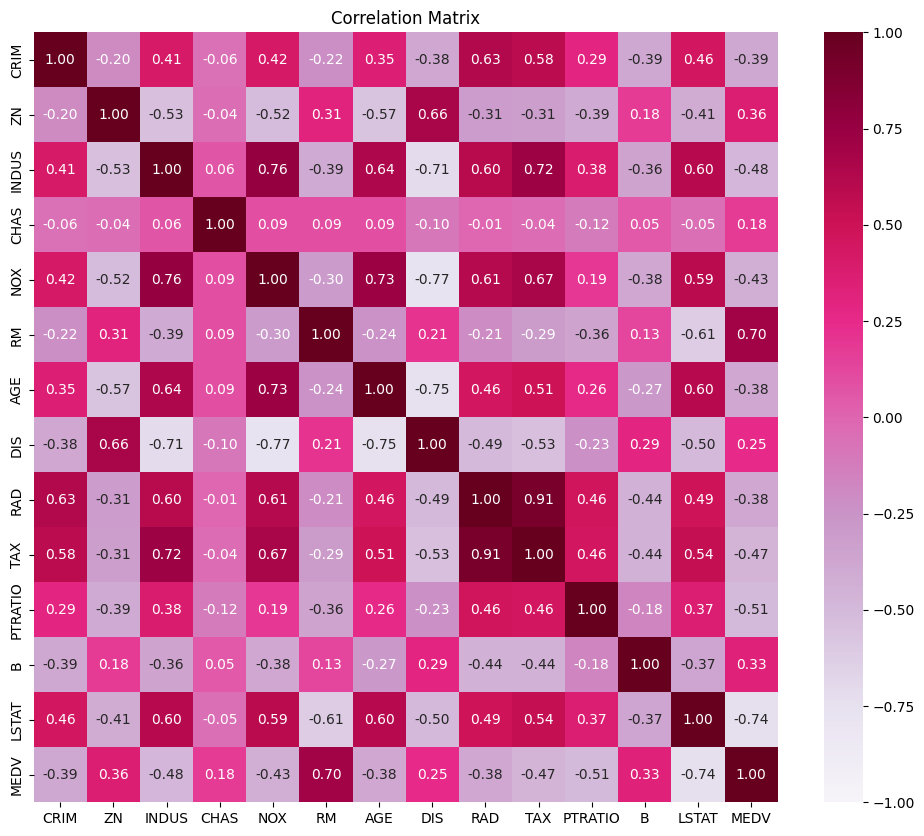

In [5]:
%matplotlib inline
correlation_matrix = data.corr();
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='PuRd', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()

The correlation matrix generated in the report is not the same as the one here.  
By default, the pandas corr() method uses Pearson correlation, which measures linear relationships.  
The report generated by tools like ydata_profiling may use a different type of correlation (Pearson, Spearman, or Kendall). In our report, it uses **Spearman**.

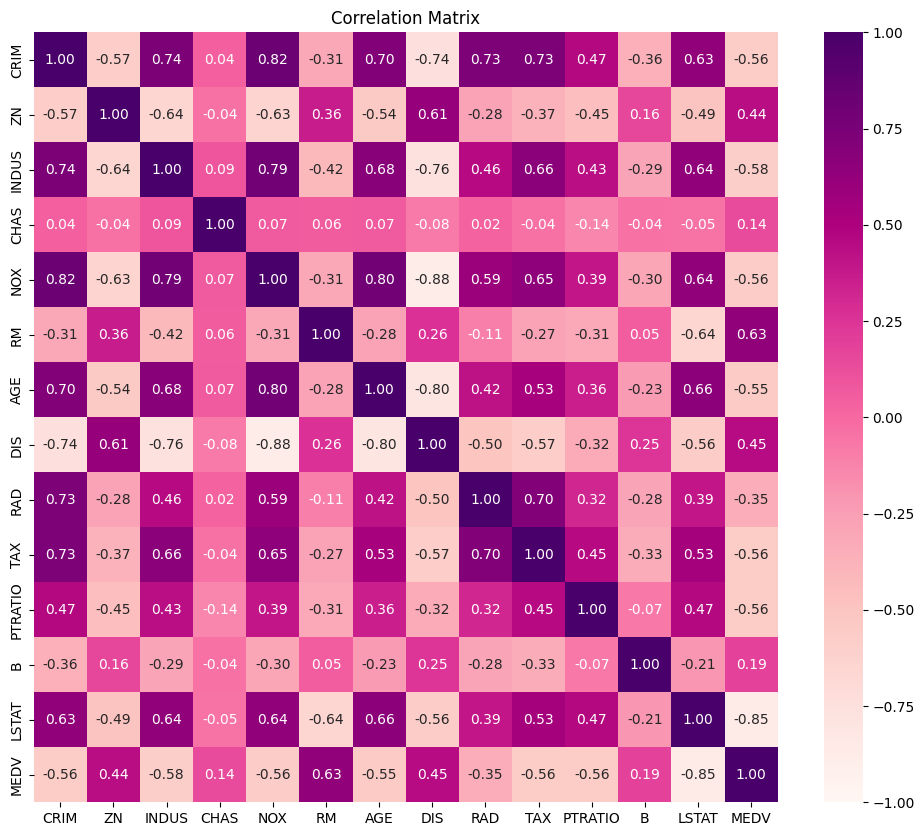

In [6]:
%matplotlib inline
correlation_matrix = data.corr(method='spearman');
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='RdPu', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()

### <u>Features :</u>

With that analyse we can see that the top 3 features are:
- <span style="color:#DEABAF">**LSTAT (Percentage of population with lower socioeconomic status): -85%%**</span>
- <span style="color:#DEABAF">**RM (Average number of rooms per dwelling): 63%**</span>
- <span style="color:#DEABAF">**INDUS (Proportion of non-retail business acres per town): -58%%**</span>

<span style="color:#DEABAF">LSTAT</span>: The fewer people with a low economic status, the higher the housing prices.  
<span style="color:#DEABAF">RM</span>: The more rooms there are, the larger the house, and thus the higher the price.  
<span style="color:#DEABAF">INDUS</span>: The more industrial the area, the lower the housing prices.  

These two features, LSTAT and RM, are particularly useful because they have strong correlations with MEDV, at -0.85 and 0.63, respectively. However, INDUS might be less effective for prediction because its correlation with MEDV is only 58%. 

## **<span style="color:#DEABAF">Linear Regression on Boston Housing Dataset</span>**

let's build a linear regression model to predict the median value of homes (MEDV).

### <u> Step 1: Simple Linear Regression </u>

Using one feature to predict MEDV : RM

#### <span style="color:#DEABAF">Prepare the data </span>

In [7]:
X = data[['RM']]
y = data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### <span style="color:#DEABAF">Model creation, fit & prediction</span>

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#### <span style="color:#DEABAF">MSE & R^2 score</span>

In [9]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
r2 = r2_score(y_test, y_pred)
print('R2 Score:', r2)

Mean Squared Error: 40.35144969787305
R2 Score: 0.4584649934303068


#### <span style="color:#DEABAF">Graph</span>

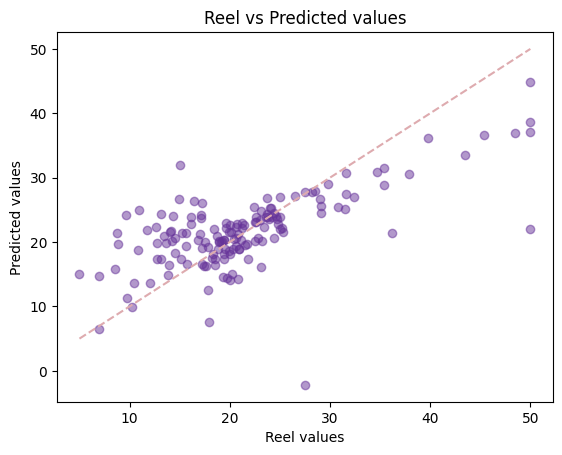

In [10]:
plt.scatter(y_test, y_pred, alpha=0.5, color='rebeccapurple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#DEABAF', linestyle='--')
plt.xlabel('Reel values')
plt.ylabel('Predicted values')
plt.title('Reel vs Predicted values')

plt.show()  


#### <span style="color:#DEABAF">Discussion</span>  
The MSE of 40.351 indicates that the model's predictions have a substantial amount of error. Ideally, the MSE should be as close to 0 as possible. This relatively high MSE suggests that the model's predictions are not very accurate and that there is a significant discrepancy between the actual and predicted values.  

The R² score of 0.458 implies that the model explains approximately 45.8% of the variance in the target variable. It indicates that the model's explanatory power is moderate. The model does not capture more than half of the variability in the data, suggesting room for improvement in predicting the target variable. 

### <u> Step 2: Multiple Linear Regression </u>
Using Lstat, RM, INDUS

#### <span style="color:#DEABAF">Prepare the data </span>

In [11]:
X2 = data[['RM', 'LSTAT', 'INDUS']]
y2 = data['MEDV']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

#### <span style="color:#DEABAF">Model creation, fit & prediction</span>

In [12]:
model = LinearRegression()
model.fit(X_train2, y_train2)
y_pred2 = model.predict(X_test2)

#### <span style="color:#DEABAF">MSE & R^2 score</span>

In [13]:
mse = mean_squared_error(y_test2, y_pred2)
print('Mean Squared Error:', mse)
r2 = r2_score(y_test2, y_pred2)
print('R2 Score:', r2)

Mean Squared Error: 29.659612955864173
R2 Score: 0.6019543580919948


#### <span style="color:#DEABAF">Graph</span>

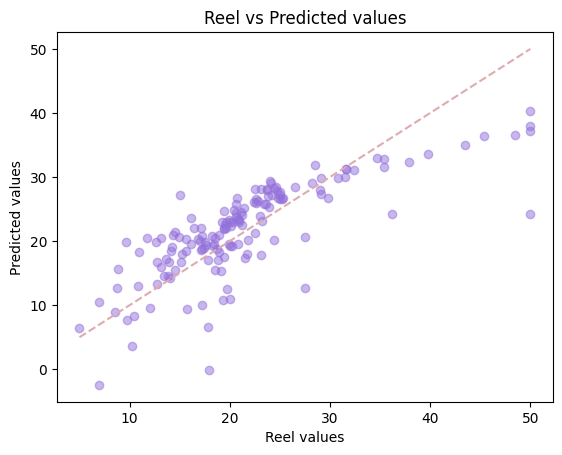

In [14]:
plt.scatter(y_test2, y_pred2, alpha=0.5, color='mediumpurple')
plt.plot([min(y_test2), max(y_test2)], [min(y_test2), max(y_test2)], color='#DEABAF', linestyle='--')
plt.xlabel('Reel values')
plt.ylabel('Predicted values')
plt.title('Reel vs Predicted values')
plt.show()  

#### <span style="color:#DEABAF">Discussion</span>  

The MSE of 29.82 shows that the model's predictions contain a moderate amount of error. Ideally, an MSE close to 0 would be optimal, but here, this value indicates that while the model makes reasonable predictions, there is still a significant gap between the actual and predicted values. However, a lower MSE than the previous one suggests that the model is more accurate than before.

The R² score of 0.60 means that the model explains about 60% of the variance in the target variable (MEDV). This represents an improvement compared to the previous 45.8% explanation. Although this score shows that the model captures a significant part of the variability, there is still 40% of the variance that is not explained, leaving room for improvement in predicting the target.

### <u> Difference between One feature and mulpiple features </u>


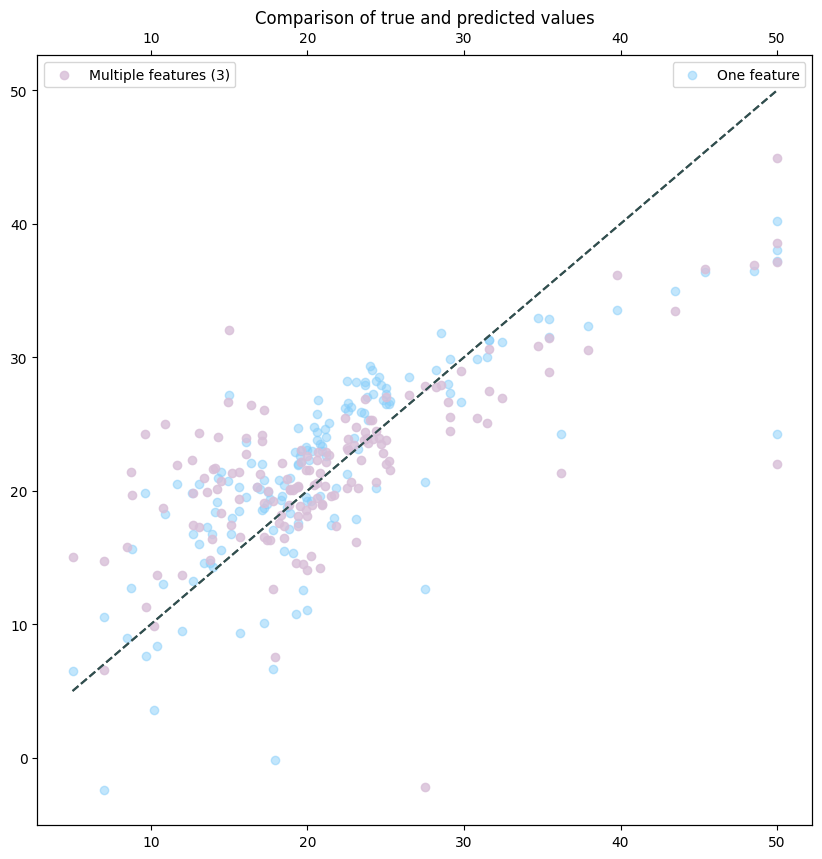

In [15]:
plt.figure(figsize=(10,10), dpi=100)
plt.scatter(y_test2, y_pred2, alpha=0.5, color="lightskyblue", label="One feature")
plt.plot([min(y_test2), max(y_test2)], [min(y_test2), max(y_test2)], color='dimgray', linestyle='--')
plt.xlabel=('True values')
plt.ylabel=('Predict values')
plt.title('Comparison of true and predicted values')
plt.legend(loc='upper right')

plt.twiny()

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='darkslategray', linestyle='--')
plt.scatter(y_test, y_pred, alpha=0.8, color="thistle", label="Multiple features (3)")

plt.legend(loc='upper left')
plt.show()

### <u> Using Log </u>


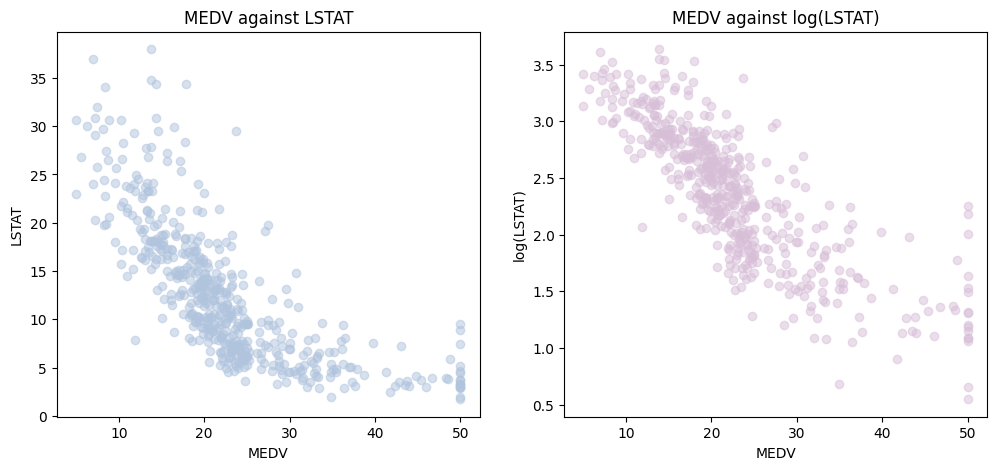

In [18]:
import numpy as np
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(data['MEDV'], data['LSTAT'], alpha=0.5, color="lightsteelblue")
ax1.set_title('MEDV against LSTAT')
ax1.set_xlabel('MEDV')
ax1.set_ylabel('LSTAT')

ax2.scatter(data['MEDV'], np.log(data['LSTAT']), alpha=0.5, color="thistle")
ax2.set_title('MEDV against log(LSTAT)')
ax2.set_xlabel('MEDV')
ax2.set_ylabel('log(LSTAT)')

plt.show()  